In [90]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

In [91]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

identification = test["PassengerId"]

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
def clean(data):
  data = data.drop(["Ticket", "Cabin", "Name", "PassengerId"], axis=1)
  
  cols = ["SibSp",
          "Parch",
          "Fare",
          "Age"]

  for col in cols:
    data[col].fillna(data[col].median(),
                     inplace=True)
    
  data.Embarked.fillna("U", inplace=True)
  return data

data = clean(data)
test = clean(test)

In [93]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [94]:
le = preprocessing.LabelEncoder()

cols = ["Sex", "Embarked"]

for col in cols:
  data[col] = le.fit_transform(data[col])
  test[col] = le.fit_transform(test[col])
  print(le.classes_)

['female' 'male']
['C' 'Q' 'S']


In [7]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [8]:
cols = ['Age', 'SibSp', 'Parch', 'Fare']

z_scores = np.abs(stats.zscore(data[cols]))

threshold = 3

data = data[(z_scores < threshold).all(axis=1)]

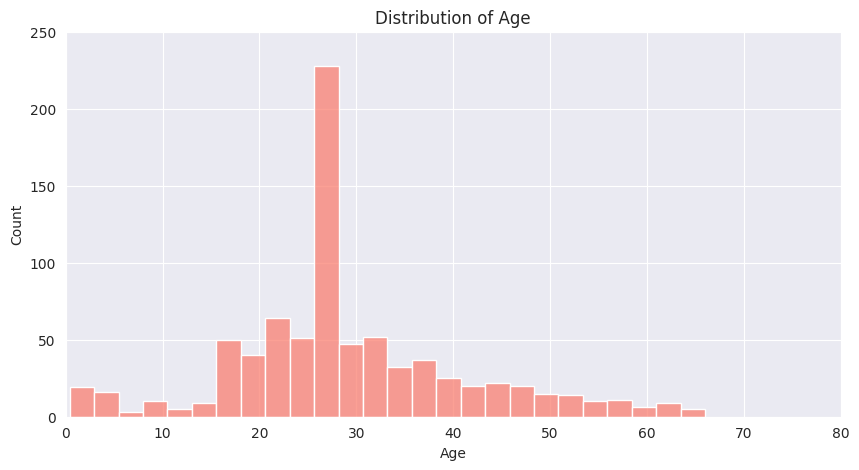

In [9]:
sns.set_style("darkgrid")
sns.set_palette("Set2")
sns.histplot(data["Age"], kde=False, color="salmon")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.xlim(0,80)
plt.ylim(0, 250)
plt.gcf().set_size_inches(10, 5)
plt.show()

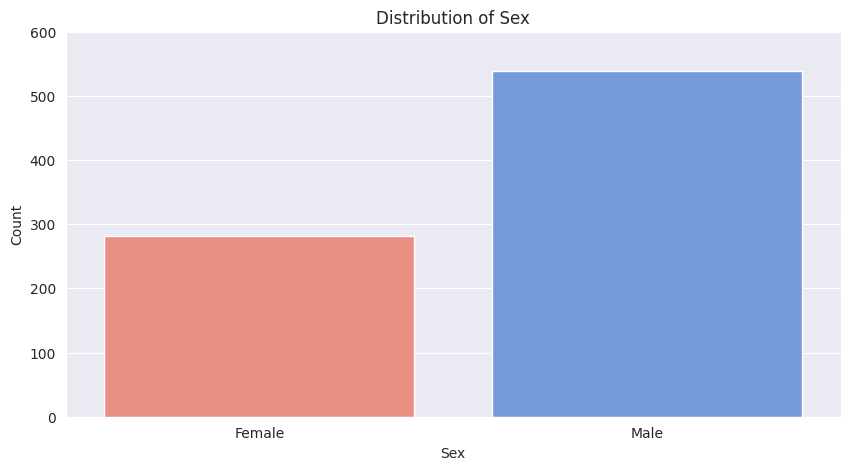

In [10]:
sns.set_style("darkgrid")
sns.set_palette("Set2")
sex_counts = data["Sex"].value_counts()
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette=["salmon", "cornflowerblue"])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Distribution of Sex")
plt.xticks(range(2), ["Female", "Male"])
plt.ylim(0, 600)
plt.gcf().set_size_inches(10, 5)
plt.show()

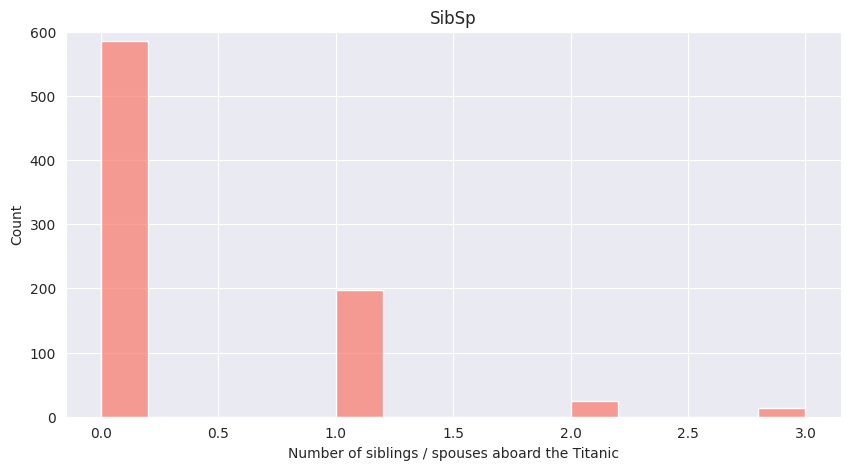

In [11]:
sns.set_style("darkgrid")
sns.set_palette("Set2")
sns.histplot(data["SibSp"], kde=False, color="salmon")
plt.xlabel("Number of siblings / spouses aboard the Titanic")
plt.ylabel("Count")
plt.title("SibSp")
plt.ylim(0, 600)
plt.gcf().set_size_inches(10, 5)
plt.show()

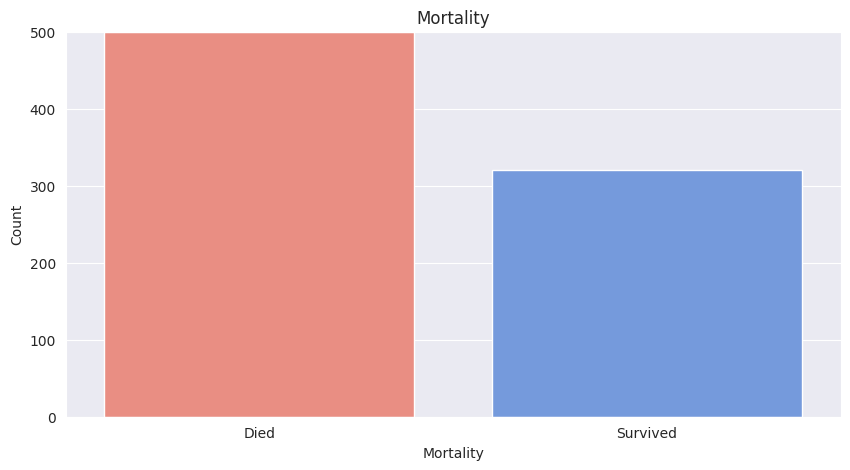

In [12]:
sns.set_style("darkgrid")
sns.set_palette("Set2")
sex_counts = data["Survived"].value_counts()
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette=["salmon", "cornflowerblue"])
plt.xlabel("Mortality")
plt.ylabel("Count")
plt.title("Mortality")
plt.xticks(range(2), ["Died", "Survived"])
plt.ylim(0, 500)
plt.gcf().set_size_inches(10, 5)
plt.show()

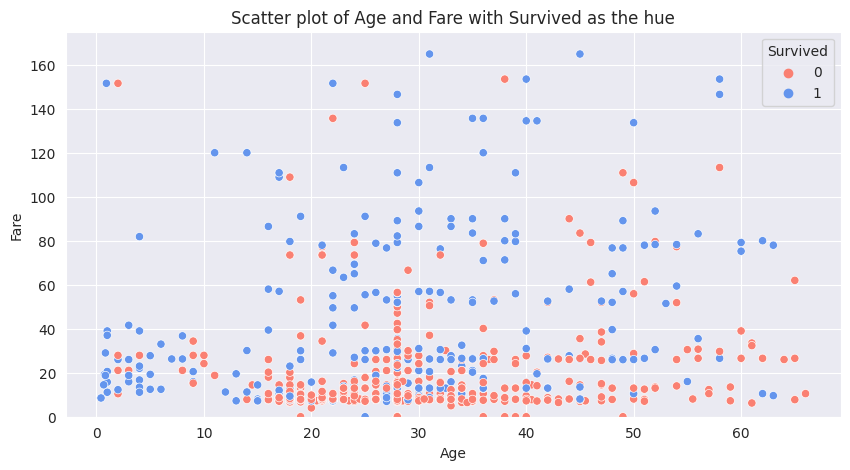

In [19]:
sns.set_style("darkgrid")
sns.set_palette("Set2")
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=data, palette=["salmon", "cornflowerblue"])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter plot of Age and Fare with Survived as the hue")
plt.ylim(0, 175)
plt.gcf().set_size_inches(10, 5)

plt.show()

In [14]:
X = data.drop("Survived", axis=1)
y = data["Survived"]


X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(656, 656, 164, 164)

In [15]:
X_train_tensor = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
X_val_tensor = tf.convert_to_tensor(X_val.values, dtype=tf.float32)
y_val_tensor = tf.convert_to_tensor(y_val.values, dtype=tf.float32)

In [82]:
model = tf.keras.Sequential([
    keras.layers.Dense(units=64, activation='softmax', input_shape=(7,)),
    keras.layers.Dense(units=32, activation='softmax'),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [83]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint('model.h5', monitor='loss', save_best_only=True)
earlystop = EarlyStopping(monitor='loss', patience=10)

model.fit(X_train_tensor, y_train_tensor, epochs=500, batch_size=32, validation_data=(X_val_tensor, y_val_tensor), callbacks=[earlystop, checkpoint])

In [85]:
model.evaluate(X_val, y_val)

6/6 [==============================] - 0s 3ms/step - loss: 0.4091 - accuracy: 0.8171


[0.40911298990249634, 0.8170731663703918]

In [122]:
test_preds = model.predict(tf.convert_to_tensor(test.values, dtype=tf.float32))

14/14 [==============================] - 0s 2ms/step


In [141]:
test_preds = np.round(test_preds).astype(int)
test_preds.shape

(418, 1)

In [142]:
submission = pd.DataFrame({'PassengerId':identification,'Survived':test_preds.reshape(418,)})

In [143]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [144]:
submission.to_csv("submission.csv", index=False)